In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv ('/content/sample_data/Omnify-Analyst-Intership-Task.csv')
data.head(10) # here read the data set

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,03-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA
5,25-Jan-21,EK_Generic_Swimming_Canada,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,1,2,4.93,0,0,NaN,NaN,USA
6,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_Software_Exact,Exact,pool reservation software,USD,1,3,13.44,1,0,NaN,NaN,USA
7,25-Jan-21,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,USD,1,9,6.08,0,0,NaN,NaN,USA
8,25-Jan-21,EK_Generic_Quad-Tok_Yoga_Singapore,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,1,3,6.38,0,0,NaN,NaN,USA
9,25-Jan-21,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,14,0.00,0,0,NaN,NaN,USA


In [3]:


# Load the data into a DataFrame
df = pd.read_csv('/content/sample_data/Omnify-Analyst-Intership-Task.csv')

# Convertion 'Payment Date'to datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Set 'Payment Date'as index
df.set_index('Payment Date', inplace=True)

# Handle missing values in 'Payment($)' by filling with 0
df['Payment ($)'].fillna(0, inplace=True)

# Convert 'Payment($)' column to number
df['Payment ($)'] = pd.to_numeric(df['Payment ($)'], errors='coerce')


In [4]:
# Group by week and calculate key metrics
weekly_report = df.resample('W').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Country': 'first'  # Assume the 'Country' value is consistent within a week
})

# Group by month
monthly_report = df.resample('M').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Country': 'first'  # Assume the 'Country' value is consistent within a month
})

# Handling missing values here
weekly_report['Returns_Percentage'] = (weekly_report['Payment ($)'] / weekly_report['Cost ($)']) * 100
monthly_report['Returns_Percentage'] = (monthly_report['Payment ($)'] / monthly_report['Cost ($)']) * 100


In [5]:
# Select the relevant data fields for the combined report
weekly_combined = weekly_report[['Cost ($)', 'Payment ($)', 'Returns_Percentage', 'Clicks', 'Impressions', 'Leads', 'Prospects', 'Country']]
monthly_combined = monthly_report[['Cost ($)', 'Payment ($)', 'Returns_Percentage', 'Clicks', 'Impressions', 'Leads', 'Prospects', 'Country']]


In [6]:
print("Weekly Report:")
print(weekly_combined)

print("\nMonthly Report:")
print(monthly_combined)


Weekly Report:
              Cost ($)  Payment ($)  Returns_Percentage  Clicks  Impressions  \
Payment Date                                                                   
2021-02-07       38.33          0.0                 0.0       2           17   
2021-02-14        0.00          0.0                 NaN       0            0   
2021-02-21       12.05          0.0                 0.0       4           27   
2021-02-28        0.00          0.0                 NaN       0            0   
2021-03-07       15.97          0.0                 0.0       3           31   
2021-03-14       45.13          0.0                 0.0       4          154   
2021-03-21        0.00          0.0                 NaN       0            0   
2021-03-28        0.00          0.0                 NaN       0            0   
2021-04-04       50.15          0.0                 0.0      12           35   
2021-04-11        0.00          0.0                 NaN       0            0   
2021-04-18        0.00   

# **Which is the most profitable channel**

In [7]:


# Load the data into a DataFrame
df = pd.read_csv('/content/sample_data/Omnify-Analyst-Intership-Task.csv')

# Convert 'Payment Date' column to datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Handle missing values in 'Payment($)' by filling with 0
df['Payment ($)'].fillna(0, inplace=True)

# Convert 'Payment($)' column to numeric type
df['Payment ($)'] = pd.to_numeric(df['Payment ($)'], errors='coerce')

# Calculate return percentage for each campaign
df['Return_Percentage'] = (df['Payment ($)'] / df['Cost ($)']) * 100

# Group data by 'Campaign' and calculate the mean return percentage for each campaign
campaign_profitability = df.groupby('Campaign')['Return_Percentage'].mean()

# Find the most profitable channel (campaign) based on the highest return percentage
most_profitable_channel = campaign_profitability.idxmax()

print("The most profitable channel is:", most_profitable_channel)


The most profitable channel is: EK_Generic_Quad-Tok_Pilates


# **Which category/keyword is the most profitable**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


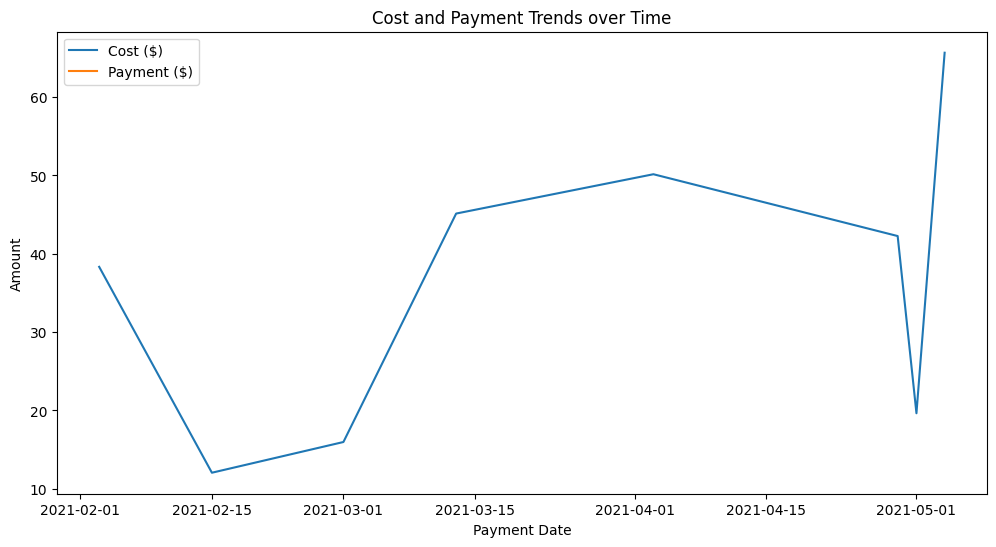

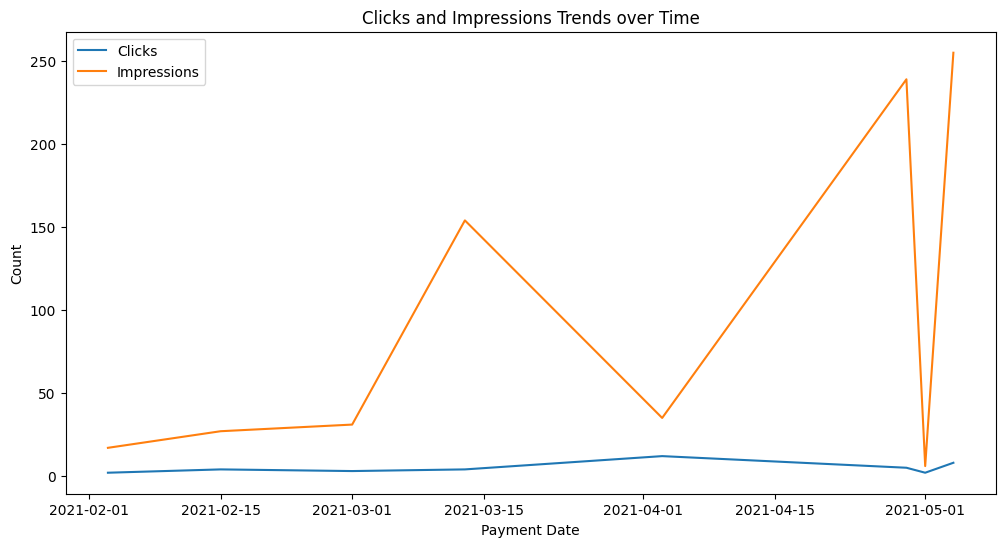

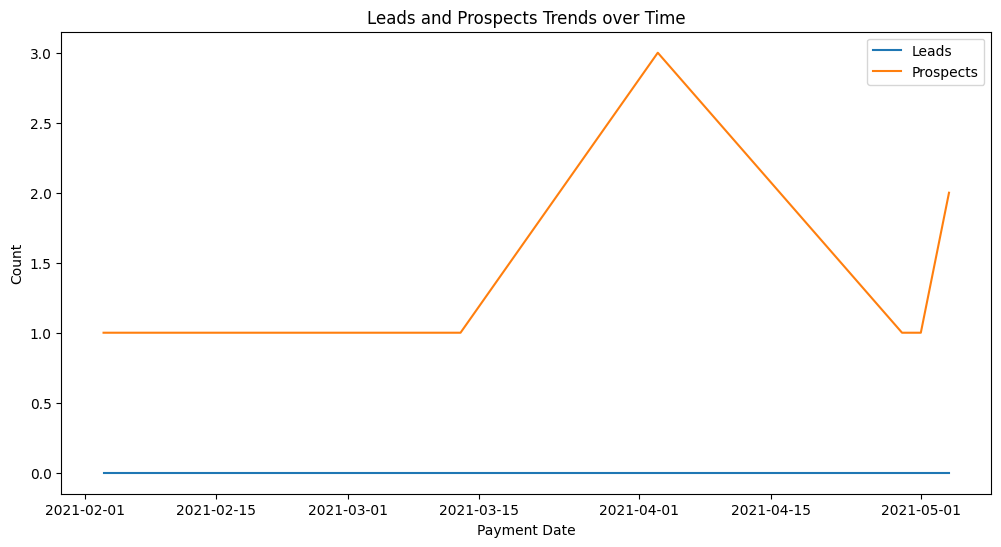

In [9]:
# Time series plot for 'Cost($)' and 'Payment($)'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Cost ($)', label='Cost ($)')
sns.lineplot(data=df, x='Payment Date', y='Payment ($)', label='Payment ($)')
plt.title('Cost and Payment Trends over Time')
plt.xlabel('Payment Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Time series plot for 'Clicks' and 'Impressions'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Clicks', label='Clicks')
sns.lineplot(data=df, x='Payment Date', y='Impressions', label='Impressions')
plt.title('Clicks and Impressions Trends over Time')
plt.xlabel('Payment Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Time series plot for 'Leads' and 'Prospects'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Leads', label='Leads')
sns.lineplot(data=df, x='Payment Date', y='Prospects', label='Prospects')
plt.title('Leads and Prospects Trends over Time')
plt.xlabel('Payment Date')
plt.ylabel('Count')
plt.legend()
plt.show()


# - Look for insights by analyzing data points on time series **graphs**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Week                418 non-null    object        
 1   Campaign            418 non-null    object        
 2   Ad group            418 non-null    object        
 3   Keyword type        418 non-null    object        
 4   Search Keyword      418 non-null    object        
 5   Currency            418 non-null    object        
 6   Clicks              418 non-null    int64         
 7   Impressions         418 non-null    int64         
 8   Cost ($)            418 non-null    float64       
 9   Leads               418 non-null    int64         
 10  Prospects           418 non-null    int64         
 11  Payment ($)         410 non-null    float64       
 12  Payment Date        8 non-null      datetime64[ns]
 13  Country             418 non-null    object        

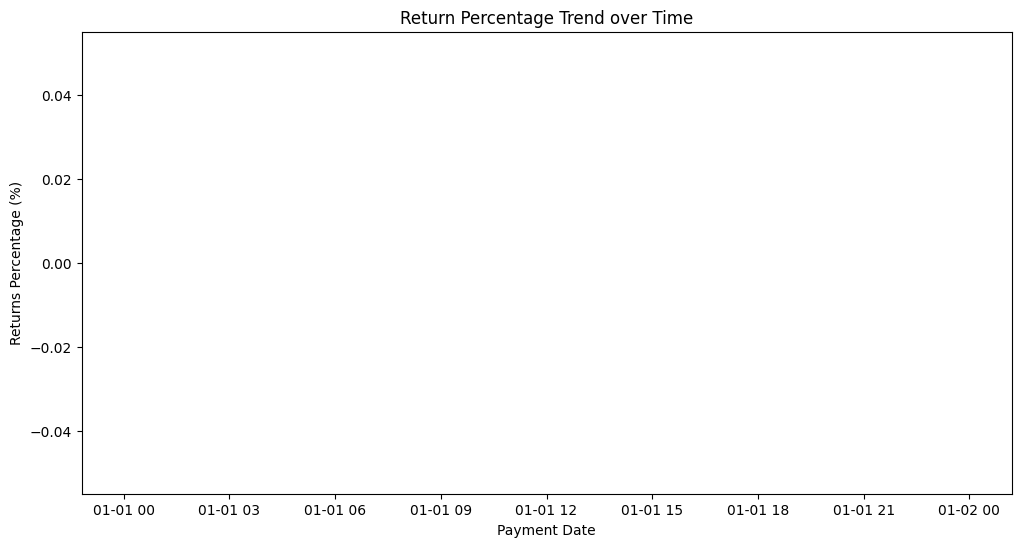

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data into a DataFrame
df = pd.read_csv('/content/sample_data/Omnify-Analyst-Intership-Task.csv')

# Convert 'Payment Date' column to datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Handle missing values in 'Payment($)' by filling with 0
df['Payment ($)'].fillna(0, inplace=True)

# Convert 'Payment($)' column to numeric type
df['Payment ($)'] = pd.to_numeric(df['Payment ($)'], errors='coerce')

# Calculate return percentage for each category/keyword
df['Returns_Percentage'] = (df['Payment ($)'] / df['Cost ($)']) * 100

# Verify the column names and datatypes in the DataFrame
print(df.info())

# Time series plot for 'Returns_Percentage'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Returns_Percentage')
plt.title('Return Percentage Trend over Time')
plt.xlabel('Payment Date')
plt.ylabel('Returns Percentage (%)')
plt.show()


# Analyse the Impact of **geography**

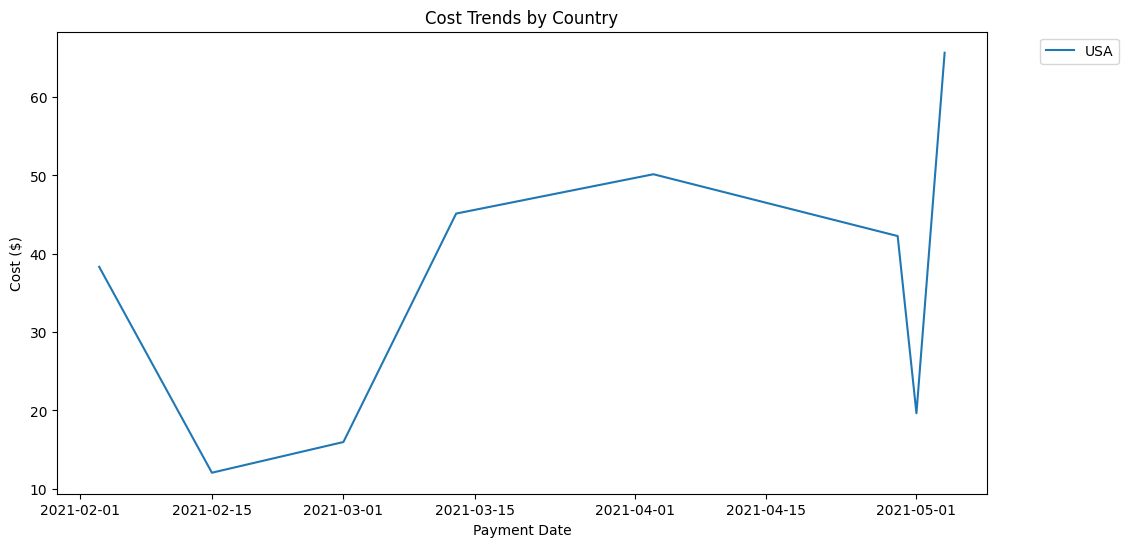

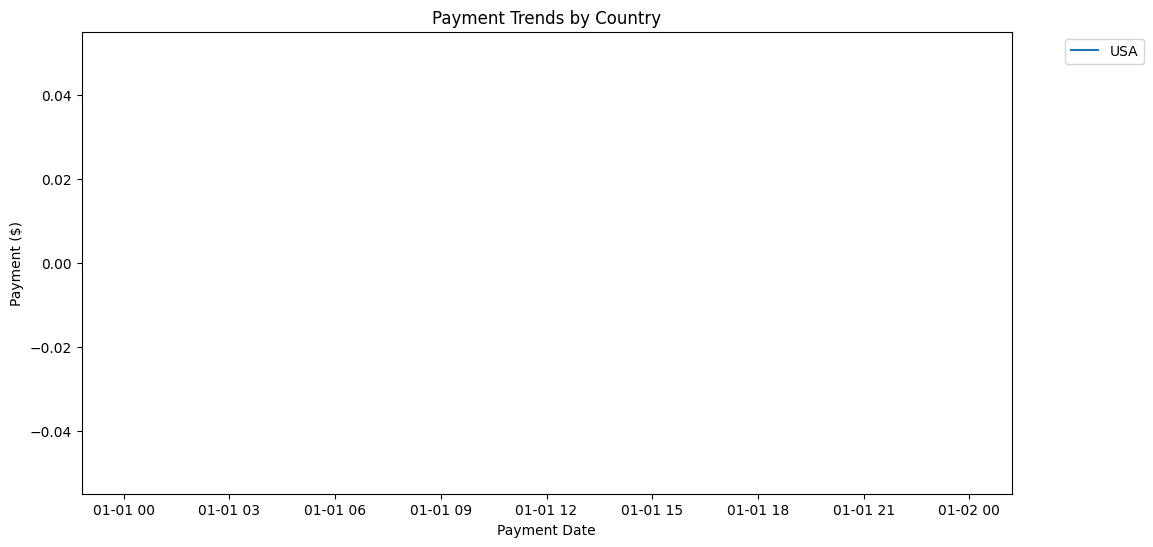

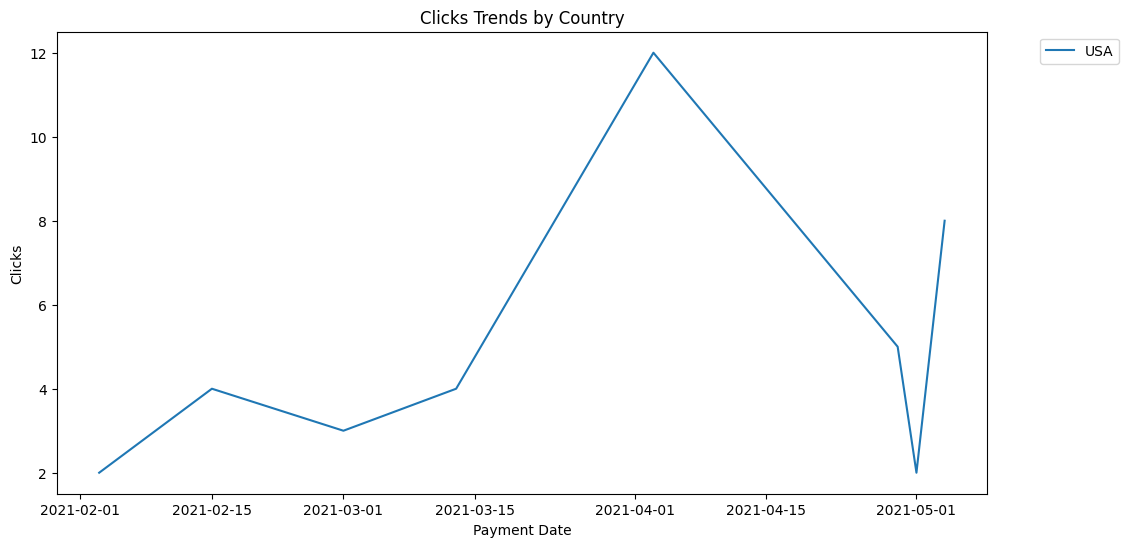

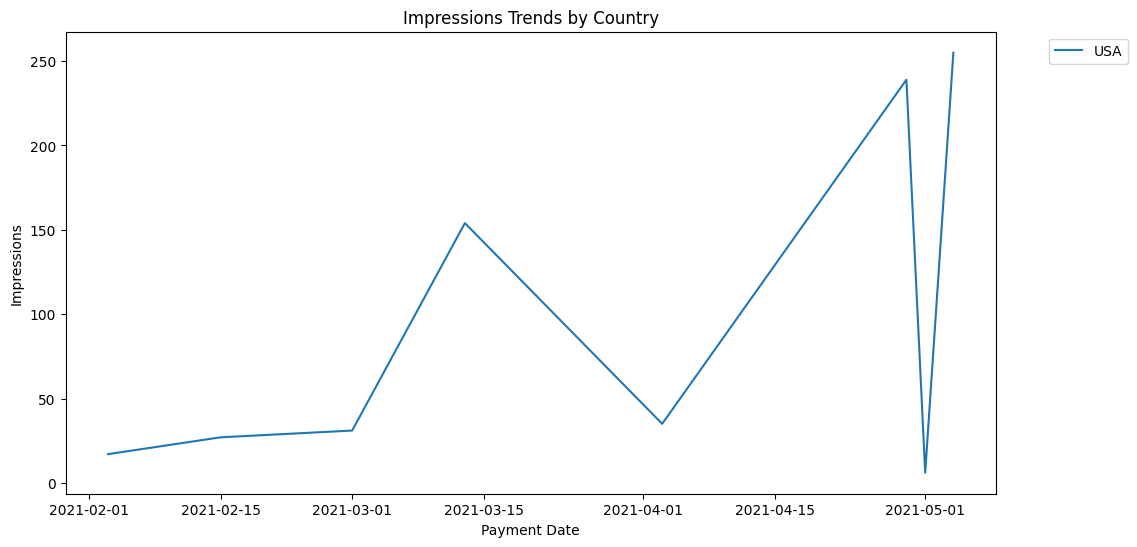

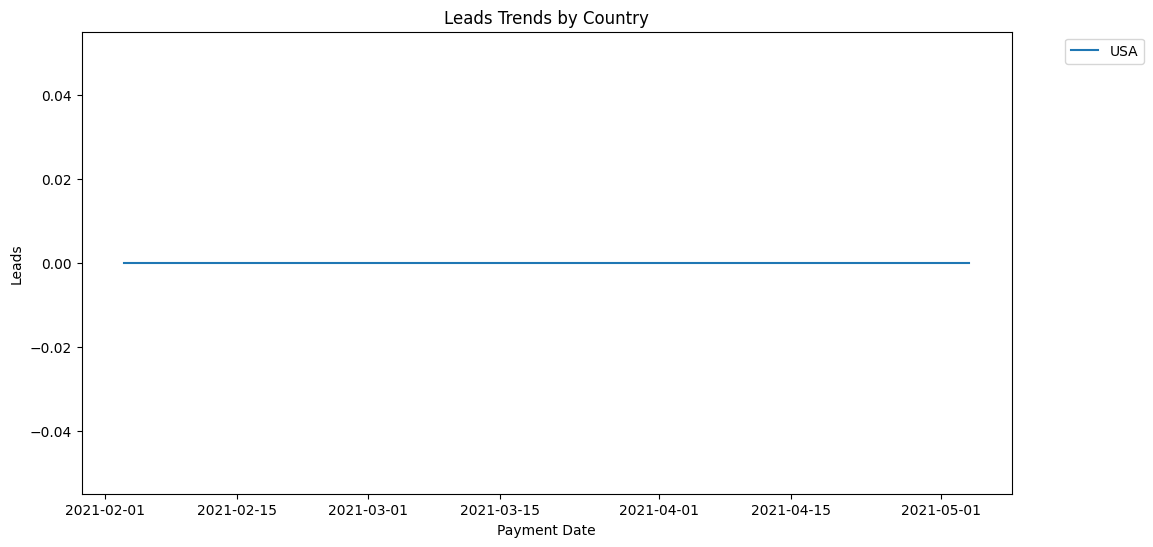

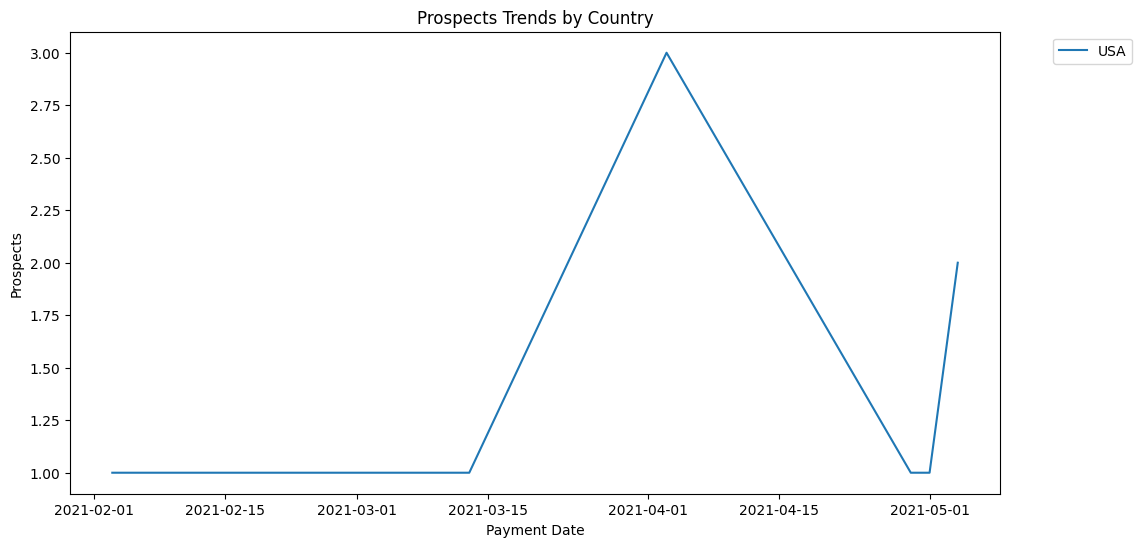

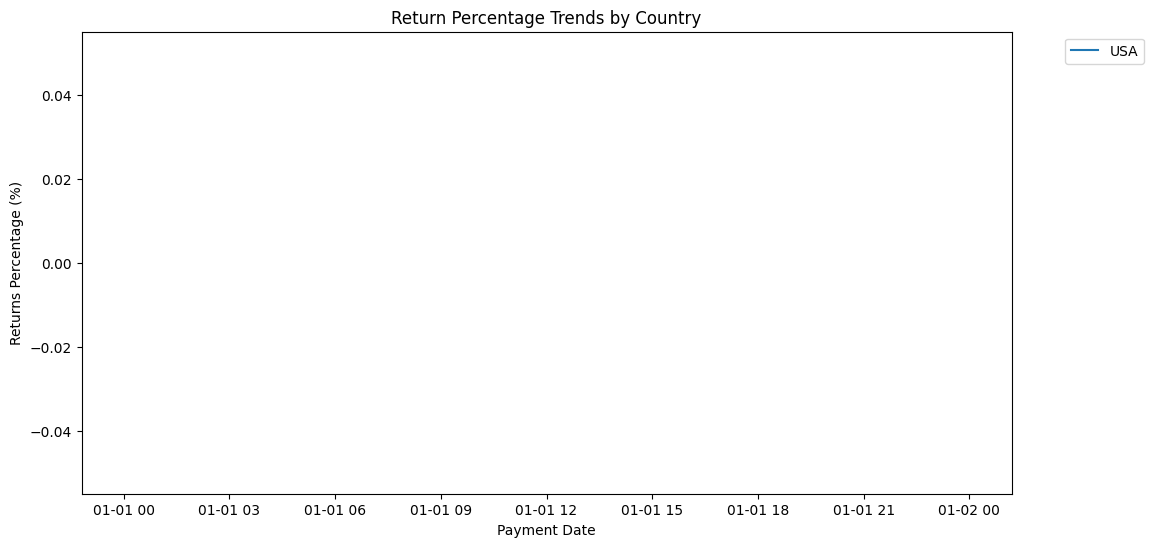

In [11]:
# Time series plot for 'Cost($)' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Cost ($)', hue='Country')
plt.title('Cost Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Cost ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Payment($)' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Payment ($)', hue='Country')
plt.title('Payment Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Payment ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Clicks' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Clicks', hue='Country')
plt.title('Clicks Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Clicks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Impressions' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Impressions', hue='Country')
plt.title('Impressions Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Impressions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Leads' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Leads', hue='Country')
plt.title('Leads Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Leads')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Prospects' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Prospects', hue='Country')
plt.title('Prospects Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Prospects')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time series plot for 'Returns_Percentage' by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Payment Date', y='Returns_Percentage', hue='Country')
plt.title('Return Percentage Trends by Country')
plt.xlabel('Payment Date')
plt.ylabel('Returns Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [12]:
# finally create an new Dataset here to load content
# Load data into  DataFrame
df = pd.read_csv('/content/sample_data/Omnify-Analyst-Intership-Task.csv')

# Convert 'Payment Date' column to datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Handle missing values in 'Payment($)' by filling with 0
df['Payment ($)'] = pd.to_numeric(df['Payment ($)'], errors='coerce').fillna(0)

# Handle missing values in 'Cost($)' by filling with 0
df['Cost ($)'] = pd.to_numeric(df['Cost ($)'], errors='coerce').fillna(0)

# Calculate return percentage for each category/keyword
df['Returns_Percentage'] = (df['Payment ($)'] / df['Cost ($)']) * 100

# Save DataFrame to Excel file to it.
df.to_excel('marketing_data_analysis.xlsx', index=False, engine='openpyxl')
